<img src="im_note/AC-logo.png" alt="Drawing" style="width: 200px;"/> <img src="im_note/logo.png" alt="Drawing" style="width: 150px;"/> 
<img src="im_note/logo3.png" alt="Drawing" style="width: 350px;"/><img src="im_note/GCRF.png" alt="Drawing" style="width: 150px;"/>

# Using linear autoregression (AR) to forecast VCI on MODIS data

In [1]:
import ARplot
import numpy as np
import warnings
from astropy.table import Table
import pandas as pd
warnings.filterwarnings('ignore')

<img src="im_note/livelihood_zones1.png" alt="Drawing" style="width: 650px;"/> 

<b>This notebook demonstrates the use of the AR method to forecast the weekly and 3 monthly VCI.</b>

<b>This example is for the county livelihood zone intersection.</b>

<b>First we load the weekly and 3 monthly VCI data.</b>

## Picking a Region to Load

In [2]:
x = pd.read_csv('im_note/Index.csv')
x = np.array(x).T
a = x[0].tolist()
b = x[1].tolist()
t = Table([a[:33], b[:33]], names=("Region",'Index Number'))
t.show_in_notebook()


idx,Region,Index Number
0,Baringo_Z24,0
1,Baringo_Z24_RBFP_a,1
2,Baringo_Z24_RBFP_an_tri,2
3,Elgeyo_Marakwet_Z24,3
4,Garsa_Z10,4
5,Isiolo_Z10,5
6,Isiolo_Z10_RBFP_an,6
7,Isiolo_Z10_RBFP_an_trip,7
8,Isiolo_Z24,8
9,Isiolo_Z5,9


In [3]:
region = ARplot.which_region()

Please Pick a number. 2,3,6,7 are invalid choices10


### The following cell calls a function to load in time, VCI and 3 Month VCI to 3 variables 

In [4]:
# The input here should be an array, with the first row being the dates of observation in the format of days since
# 1/1/2000, the second row being weekly VCI, and the third row being 3 month VCI.
# T = days since 1/1/2000
# VCI1W = weekly VCI, 
# VCI3M = 3 month VCI

T,VCI1W,VCI3M = ARplot.load(region)

### The VCI and VCI3M are then plotted against time

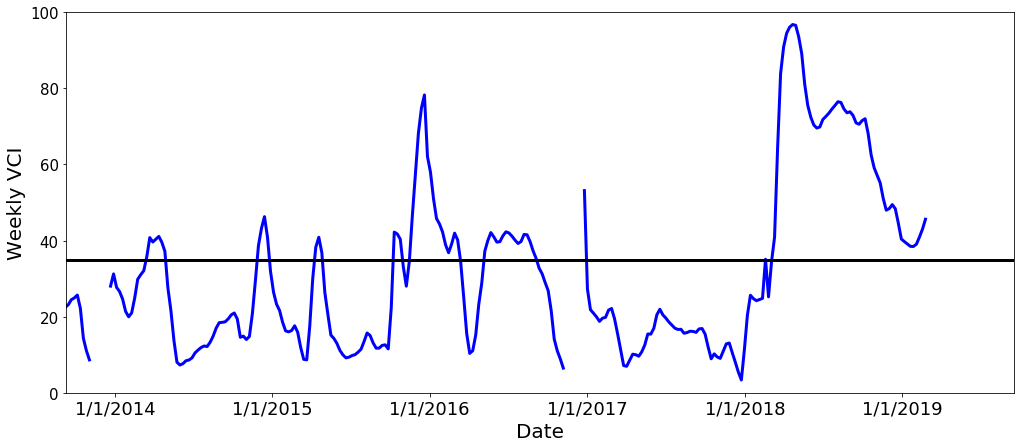

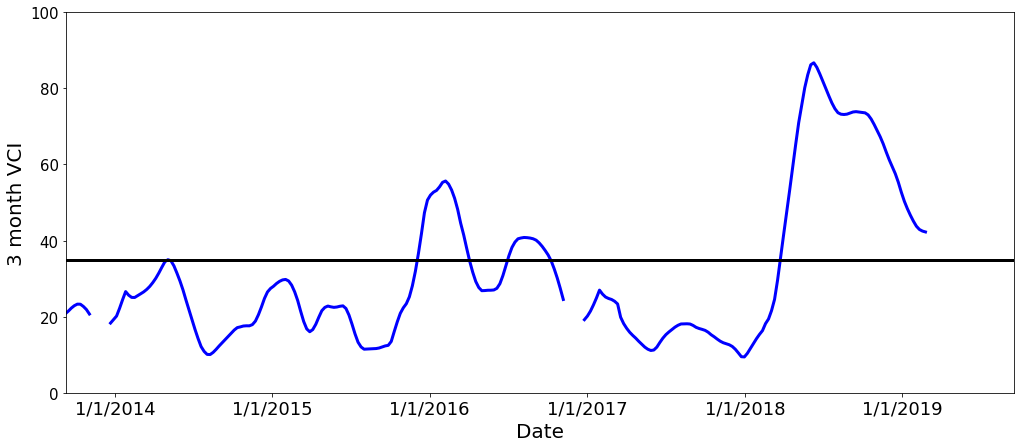

In [5]:
# The function 'plot_vci' takes the time and VCI data and VCI version as inputs and plots the data
ARplot.plot_vci(T,VCI1W,'Weekly VCI')                   
ARplot.plot_vci(T,VCI3M,'3 month VCI')                   

### The solid black lines here show VCI=35, the threshold below which the region is said to be in drought

### Next we generate a forecast for the weekly VCI for the next 8 weeks, using the AR modelling method (and a 1 standard deviation uncertainty)

In [6]:
f,s=ARplot.forecast(VCI1W)

#### Testing our code, dotted line is 2 week forecast. See Barrett, Duivenvoorden and Salkapi et al. in prep
<img src="im_note/NDVI.png" alt="Drawing" style="width: 1150px;"/> 

### And we plot this, with error bars showing the plus/minus one standard deviation uncertainty: 
### The VCI forecast for the next 8 weeks is then shown

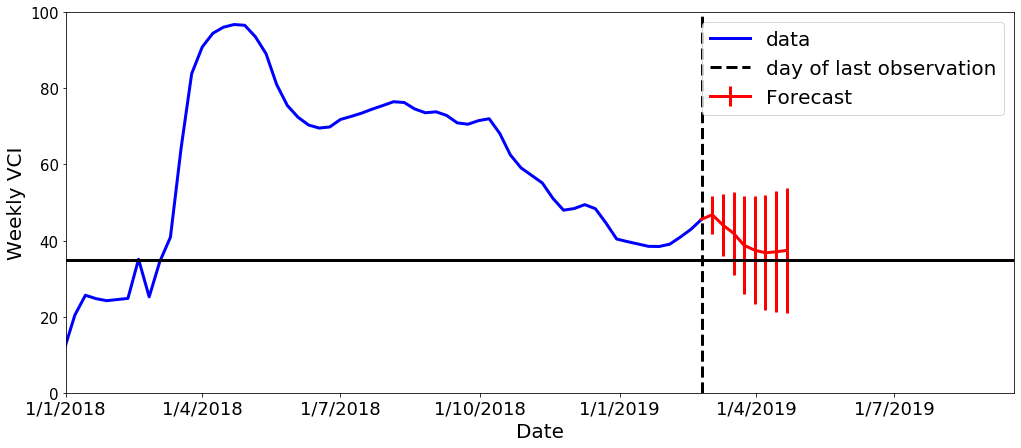

Forecast:
weeks ahead = 1 , Weekly VCI = 47
weeks ahead = 2 , Weekly VCI = 44
weeks ahead = 3 , Weekly VCI = 42
weeks ahead = 4 , Weekly VCI = 39
weeks ahead = 5 , Weekly VCI = 37
weeks ahead = 6 , Weekly VCI = 37
weeks ahead = 7 , Weekly VCI = 37
weeks ahead = 8 , Weekly VCI = 37


In [7]:
# The function 'plot_vci_fc' takes the time and VCI data, the forecast and uncertainty, 
# and VCI version, as inputs and makes a plot.

ARplot.plot_vci_fc(T,VCI1W,f,s,'Weekly VCI')

### We repeat this for the 3 month VCI: 

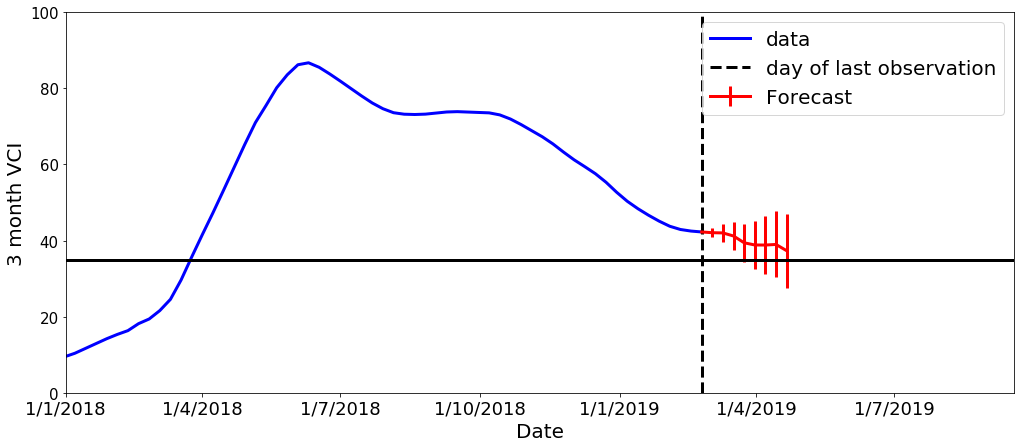

Forecast:
weeks ahead = 1 , 3 month VCI = 42
weeks ahead = 2 , 3 month VCI = 42
weeks ahead = 3 , 3 month VCI = 41
weeks ahead = 4 , 3 month VCI = 39
weeks ahead = 5 , 3 month VCI = 39
weeks ahead = 6 , 3 month VCI = 39
weeks ahead = 7 , 3 month VCI = 39
weeks ahead = 8 , 3 month VCI = 37


In [8]:
f,s=ARplot.forecast(VCI3M)
ARplot.plot_vci_fc(T,VCI3M,f,s,'3 month VCI')

### To demonstrate forecasting for another region, we now show a plot of 3 month VCI for another region:</b>

In [9]:
region = ARplot.which_region()

Please Pick a number. 2,3,6,7 are invalid choices20


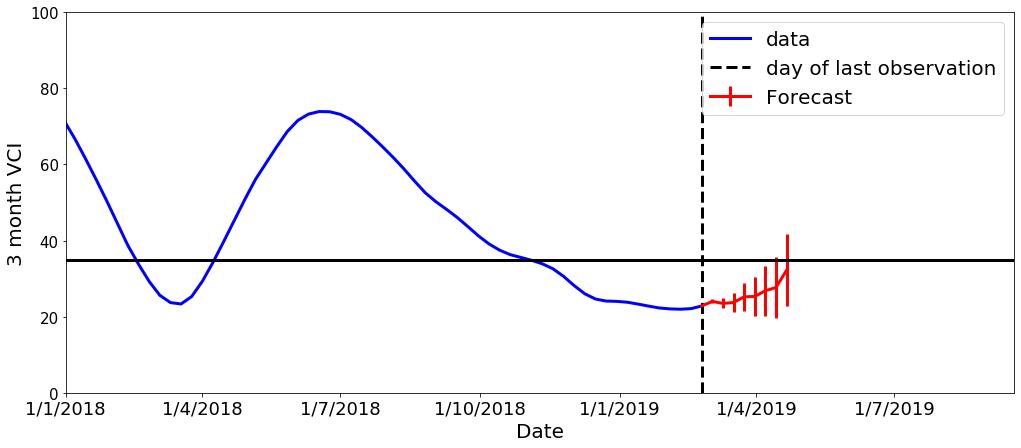

Forecast:
weeks ahead = 1 , 3 month VCI = 24
weeks ahead = 2 , 3 month VCI = 23
weeks ahead = 3 , 3 month VCI = 24
weeks ahead = 4 , 3 month VCI = 25
weeks ahead = 5 , 3 month VCI = 25
weeks ahead = 6 , 3 month VCI = 27
weeks ahead = 7 , 3 month VCI = 28
weeks ahead = 8 , 3 month VCI = 32


In [10]:
T,VCI1W,VCI3M = ARplot.load(region)
f,s=ARplot.forecast(VCI3M)
ARplot.plot_vci_fc(T,VCI3M,f,s,'3 month VCI')